# US SEX CRIMES
##### An investigation on household composition types and reported sex crimes in nine US cities

## 4.0 Crimes per Census Block Group
### Observing total crime and sex crime per census block group

##### Process:
###### 1. Read in cleaned crime and census data per city

In [1]:
# Call libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [2]:
# Change working directory to a specified directory
os.chdir('../')
print("Directory Changes")

#Get current working directory
cwd = os.getcwd()
print("Current working directory is:", cwd)

Directory Changes
Current working directory is: C:\Users\Carol\Documents\CUSP\US_SexCrime


In [3]:
#Read in cleaned crime and census data per city and set to EPSG: 4326
chicago_crime = gpd.read_file('data/interim/crime/Chicago/chicago_crime_pois.geojson')
chicago_crime = chicago_crime.to_crs({'init' : 'epsg:4326'})
chicago_dem = gpd.read_file('data/interim/census/Chicago/chicago_census.geojson')
chicago_dem = chicago_dem.to_crs({'init' : 'epsg:4326'})

C:\Users\Carol\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
#Join chicago_dem and chicago_geo on "GEO_ID"
chicago_sj = gpd.sjoin(chicago_dem, chicago_crime)
chicago = chicago_sj.groupby('GEOID').sum()
chicago = pd.merge(chicago.reset_index(), chicago_dem[['GEOID', 'geometry']], on = 'GEOID')
chicago = gpd.GeoDataFrame(chicago, geometry='geometry')

In [5]:
len(chicago[chicago['sex_crime']==0])

122

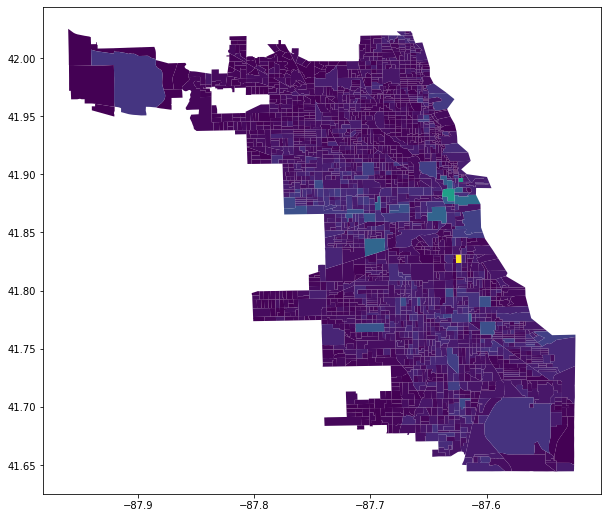

In [12]:
chicago.plot(column='sex_crime', cmap='viridis', figsize=(10,10))

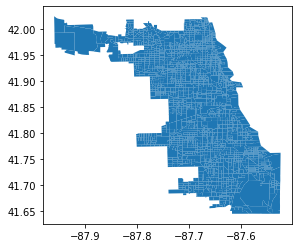

In [23]:
chicago_dem.plot()

In [13]:
chicago #add sexcrime/totalcrime

,GEOID,OID,AREALAND,AREAWATER,OBJECTID,hh_total,hh_married,hh_m,hh_fm,income_med,...,edu_m_dd,edu_f_less_hs,edu_m_less_hs,index_right,year,lat,lon,total_crime,sex_crime,geometry
0,170310101001,72361197726238528,21674661,0,69322619,109652.0,7981.0,0.0,11451.0,7992104.0,...,0.0,5899.0,0.0,199728257,699839,14581.477896,-30421.045315,347,2,"POLYGON ((-87.67072 42.02138, -87.67072 42.021..."
1,170310101002,325729656623578176,286338030,0,315216286,1377684.0,173382.0,201498.0,462352.0,33657976.0,...,0.0,124960.0,249920.0,1031596521,3150794,65637.532281,-136945.055875,1562,17,"POLYGON ((-87.67720 42.02294, -87.67628 42.022..."
2,170310101003,162239227173371200,104230994,0,30981516,811454.0,235734.0,14004.0,22562.0,42148928.0,...,13226.0,2334.0,26452.0,482782052,1569205,32691.801791,-68205.039144,778,11,"POLYGON ((-87.67265 42.02300, -87.67189 42.023..."
3,170310102011,77574540501907360,35682984,0,81094884,226176.0,107508.0,0.0,20832.0,24497688.0,...,0.0,40920.0,43896.0,249909740,750379,15629.426168,-32617.482679,372,6,"POLYGON ((-87.68408 42.01515, -87.68387 42.015..."
4,170310102012,289236257184418304,359685162,0,55463356,2124884.0,543704.0,83220.0,675469.0,52742062.0,...,13870.0,581153.0,303753.0,918566839,2797520,58277.881220,-121613.335596,1387,20,"POLYGON ((-87.68465 42.01949, -87.68432 42.019..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,170318439005,76948939367719520,20306808,0,56015307,101106.0,33210.0,4428.0,7749.0,21261411.0,...,10701.0,0.0,0.0,241056331,744380,15414.169004,-32313.396440,369,4,"POLYGON ((-87.57162 41.77350, -87.57129 41.773..."
2183,170319800001,1184054411207947520,113266583672,524658556,861948790,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3698327418,11451922,238342.499641,-499098.211567,5678,25,"POLYGON ((-87.94025 42.00717, -87.94017 42.007..."
2184,170319801001,344497690609471232,4925902212,0,153294036,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1118311347,3332115,69036.067965,-144953.519203,1652,8,"POLYGON ((-87.76230 41.79274, -87.76206 41.792..."
2185,170438400002,792421560432500,424174012,4764668,5966722,13794.0,6954.0,1292.0,3458.0,1938532.0,...,0.0,5396.0,9386.0,20536907,76616,1595.326707,-3341.176467,38,0,"POLYGON ((-87.95924 41.99113, -87.95923 41.993..."


In [5]:
chicago_dem

,MTFCC,OID,GEOID,STATE,COUNTY,TRACT,BLKGRP,BASENAME,NAME,LSADC,...,edu_m_hs,edu_m_ad,edu_m_bd,edu_m_md,edu_m_ps,edu_m_dd,block group,edu_f_less_hs,edu_m_less_hs,geometry
0,G5030,20853197888470,170317402002,17,031,740200,2,2,"Block Group 2, Census Tract 7402, Cook County,...",BG,...,228.0,18.0,33.0,15.0,0.0,0.0,2,16.0,13.0,"POLYGON ((-87.72076 41.70222, -87.72052 41.702..."
1,G5030,20853197888472,170317403005,17,031,740300,5,5,"Block Group 5, Census Tract 7403, Cook County,...",BG,...,61.0,19.0,68.0,25.0,7.0,0.0,5,26.0,20.0,"POLYGON ((-87.72064 41.69857, -87.72043 41.698..."
2,G5030,20853197888478,170317403001,17,031,740300,1,1,"Block Group 1, Census Tract 7403, Cook County,...",BG,...,49.0,84.0,120.0,21.0,0.0,0.0,1,0.0,0.0,"POLYGON ((-87.72052 41.69485, -87.72032 41.694..."
3,G5030,20853197888482,170317403003,17,031,740300,3,3,"Block Group 3, Census Tract 7403, Cook County,...",BG,...,98.0,17.0,55.0,19.0,0.0,0.0,3,0.0,0.0,"POLYGON ((-87.71318 41.69466, -87.71317 41.695..."
4,G5030,20853197888486,170317404003,17,031,740400,3,3,"Block Group 3, Census Tract 7404, Cook County,...",BG,...,207.0,57.0,115.0,35.0,14.0,0.0,3,0.0,3.0,"POLYGON ((-87.73973 41.69089, -87.73949 41.690..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,G5030,208533711030516,170313018023,17,031,301802,3,3,"Block Group 3, Census Tract 3018.02, Cook Coun...",BG,...,28.0,0.0,0.0,0.0,0.0,0.0,3,183.0,190.0,"POLYGON ((-87.73185 41.84415, -87.73169 41.844..."
2184,G5030,208533711030518,170313018022,17,031,301802,2,2,"Block Group 2, Census Tract 3018.02, Cook Coun...",BG,...,24.0,0.0,13.0,45.0,0.0,0.0,2,128.0,146.0,"POLYGON ((-87.73112 41.84698, -87.73112 41.847..."
2185,G5030,208533711030531,170310802011,17,031,080201,1,1,"Block Group 1, Census Tract 802.01, Cook Count...",BG,...,130.0,14.0,287.0,136.0,127.0,12.0,1,54.0,21.0,"POLYGON ((-87.63323 41.91116, -87.63315 41.911..."
2186,G5030,208533711133223,170318321003,17,031,832100,3,3,"Block Group 3, Census Tract 8321, Cook County,...",BG,...,6.0,12.0,159.0,41.0,15.0,0.0,3,7.0,18.0,"POLYGON ((-87.65454 41.95449, -87.65406 41.954..."
